<a href="https://colab.research.google.com/github/muditstja/Deep-learning/blob/main/CNN_LSTM_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta==0.3.14b
!pip install yfinance==0.2.12
!pip install keras
!pip install tensorflow
!pip install keras-tuner

# Fetch and initialise Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'AAPL', start = '2007-03-11',end = '2024-08-06')
data.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300
2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800
2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300
2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000
2024-08-02,219.149994,225.600006,217.710007,219.860001,219.860001,105568600


#Complex data set

In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=14)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=200)

# Assuming 'data' is your DataFrame
# data.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)

# data['Target'] = data['Adj Close']-data.Open
# data['Target'] = data['Target'].shift(-1)

# data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)


In [ ]:
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Date'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(10)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,6.790000,6.925357,6.781786,6.925357,5.855062,993960800,61.963757,6.608724,5.814105,4.854534,6.002714
1,6.965357,7.118929,6.956786,7.100000,6.002714,480202800,65.713614,6.655512,5.839568,4.876877,6.007244
2,7.107500,7.177143,7.029286,7.105357,6.007244,703732400,65.824916,6.698354,5.864633,4.899051,5.995770
3,7.105357,7.248571,7.064286,7.091786,5.995770,795527600,65.247081,6.735824,5.888933,4.920869,6.033814
4,7.163929,7.198571,7.031429,7.136786,6.033814,699647200,66.303359,6.774011,5.913643,4.942918,5.980977
5,7.125000,7.160714,7.062500,7.074286,5.980977,539333200,63.420216,6.802608,5.936626,4.964126,5.883143
6,7.116786,7.152143,6.876786,6.958571,5.883143,1079178800,58.360307,6.817462,5.956863,4.983971,5.885861
7,6.978929,7.049643,6.881786,6.961786,5.885861,842066400,58.459468,6.831207,5.976762,5.003651,5.436562
8,6.837500,6.892857,6.388929,6.430357,5.436562,1455832000,41.054732,6.793031,5.985744,5.017847,5.363793
9,6.473214,6.557143,6.079643,6.344286,5.363793,2072193200,39.028049,6.750293,5.992844,5.031045,5.170849


#Simple data set

In [3]:
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Date'], axis=1, inplace=True)
data_set = data.iloc[:, 0:7]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Close,Adj Close,Volume
0,3.145357,3.213929,3.142500,3.209643,2.713602,729408400
1,3.193214,3.235714,3.157143,3.157143,2.669215,867890800
2,3.164286,3.214286,3.140000,3.214286,2.717527,796586000
3,3.212857,3.227143,3.189643,3.198929,2.704543,559498800
4,3.197857,3.213929,3.190000,3.199643,2.705147,571704000
5,3.222857,3.269643,3.199643,3.254643,2.751647,712961200
6,3.262500,3.280000,3.252143,3.267143,2.762214,488916400
7,3.285357,3.357143,3.273214,3.352500,2.834380,686896000
8,3.347500,3.370000,3.321429,3.355714,2.837097,561492400
9,3.333929,3.359643,3.332143,3.340000,2.823813,450884000


In [4]:
import pandas as pd

# Convert to DataFrame
data_set = pd.DataFrame(data_set)
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Calculate additional columns
# data_set['turnover'] = data_set['Volume'] * data_set['Close']  # In CNN-BiLSTM-AM paper turnover means total stocks traded that day
data_set['ups_and_downs'] = data_set['Close'].diff()
data_set['change'] = data_set['Close'].pct_change() * 100

# Fill NaN values generated by diff and pct_change with 0
data_set.fillna(0, inplace=True)

# Rename columns to match required format
data_set.rename(columns={
    'Open': 'opening_price',
    'High': 'highest_price',
    'Low': 'lowest_price',
    'Close': 'closing_price',
    'Volume': 'volume'
}, inplace=True)

# Select relevant columns
data_set = data_set[['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'volume', 'ups_and_downs', 'change']] # 'turnover',

# Display the DataFrame
print(data_set)


      opening_price  highest_price  lowest_price  closing_price     volume  \
0          3.145357       3.213929      3.142500       3.209643  729408400   
1          3.193214       3.235714      3.157143       3.157143  867890800   
2          3.164286       3.214286      3.140000       3.214286  796586000   
3          3.212857       3.227143      3.189643       3.198929  559498800   
4          3.197857       3.213929      3.190000       3.199643  571704000   
...             ...            ...           ...            ...        ...   
4376     219.190002     220.330002    216.119995     218.800003   41643800   
4377     221.440002     223.820007    220.630005     222.080002   50036300   
4378     224.369995     224.479996    217.020004     218.360001   62501000   
4379     219.149994     225.600006    217.710007     219.860001  105568600   
4380     199.089996     213.500000    196.000000     209.270004  119548600   

      ups_and_downs    change  
0          0.000000  0.000000  

In [5]:
features = ['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'volume', 'ups_and_downs', 'change'] # 'turnover'
target = 'closing_price'

# Calculate the 'closing price' of the next day
data_set['Close_next_day'] = data_set['closing_price'].shift(-1)

# Drop the last row since it will have NaN value in 'Close_next_day'
data_set = data_set.dropna()

# Prepare the dataset
X = data_set[features].values
y = data_set['Close_next_day'].values

# Display the DataFrame
print(data_set)

      opening_price  highest_price  lowest_price  closing_price     volume  \
0          3.145357       3.213929      3.142500       3.209643  729408400   
1          3.193214       3.235714      3.157143       3.157143  867890800   
2          3.164286       3.214286      3.140000       3.214286  796586000   
3          3.212857       3.227143      3.189643       3.198929  559498800   
4          3.197857       3.213929      3.190000       3.199643  571704000   
...             ...            ...           ...            ...        ...   
4375     216.960007     219.300003    215.750000     218.240005   36311800   
4376     219.190002     220.330002    216.119995     218.800003   41643800   
4377     221.440002     223.820007    220.630005     222.080002   50036300   
4378     224.369995     224.479996    217.020004     218.360001   62501000   
4379     219.149994     225.600006    217.710007     219.860001  105568600   

      ups_and_downs    change  Close_next_day  
0          0.00

# MinMax Scalling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.0013268  0.00121791 0.00151823 ... 0.42851318 0.56307372 0.00157002]
 [0.00153163 0.00131089 0.00158181 ... 0.4263747  0.51167651 0.00181629]
 [0.00140782 0.00121943 0.00150737 ... 0.4308408  0.61994689 0.00175011]
 ...
 [0.93562877 0.94276608 0.94589602 ... 0.56211804 0.61017853 0.92906   ]
 [0.94816915 0.94558292 0.93022062 ... 0.27698561 0.51043898 0.93552476]
 [0.92582752 0.95036313 0.93321676 ... 0.48961299 0.58465897 0.88988356]]


# Z-Scale Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_set_scaled = sc.fit_transform(df)
print(data_set_scaled)

# Data Pre-Process

In [7]:
# multiple feature from data provided to the model
X = []

backcandles = 21
print(data_set_scaled.shape[0])
for j in range(8): #data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# Choose -1 for last column, classification else -2...
X, yi = np.array(X), np.array(data_set_scaled[backcandles:, -1])
y = np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)
print(y)
print(y.shape)

4380
[[[0.0013268  0.00121791 0.00151823 ... 0.42851318 0.56307372 0.00157002]
  [0.00153163 0.00131089 0.00158181 ... 0.4263747  0.51167651 0.00181629]
  [0.00140782 0.00121943 0.00150737 ... 0.4308408  0.61994689 0.00175011]
  ...
  [0.00225159 0.0019328  0.00237581 ... 0.42910964 0.57674006 0.00237811]
  [0.0024182  0.0020273  0.00230137 ... 0.42701478 0.52889    0.00247046]
  [0.0021828  0.00186878 0.00235875 ... 0.42938601 0.58320485 0.00221495]]

 [[0.00153163 0.00131089 0.00158181 ... 0.4263747  0.51167651 0.00181629]
  [0.00140782 0.00121943 0.00150737 ... 0.4308408  0.61994689 0.00175011]
  [0.0016157  0.00127431 0.00172293 ... 0.42788764 0.54806094 0.00175318]
  ...
  [0.0024182  0.0020273  0.00230137 ... 0.42701478 0.52889    0.00247046]
  [0.0021828  0.00186878 0.00235875 ... 0.42938601 0.58320485 0.00221495]
  [0.00221796 0.00182153 0.00219127 ... 0.42609832 0.50773108 0.00215338]]

 [[0.00140782 0.00121943 0.00150737 ... 0.4308408  0.61994689 0.00175011]
  [0.0016157  0.0

In [8]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
testSplit = int(len(X)*0.1)
print(splitlimit, testSplit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
data_set.tail(10)

3923 435
(3923, 21, 8)
(436, 21, 8)
(3923, 1)
(436, 1)
[[0.00215338]
 [0.00185323]
 [0.0020364 ]
 ...
 [0.5865139 ]
 [0.58435898]
 [0.58668626]]


,opening_price,highest_price,lowest_price,closing_price,volume,ups_and_downs,change,Close_next_day
4370,227.009995,227.779999,223.089996,223.960007,48201800,-0.349991,-0.156030,225.009995
4371,224.369995,226.940002,222.679993,225.009995,39960300,1.049988,0.468828,218.539993
4372,224.000000,224.800003,217.130005,218.539993,61777600,-6.470001,-2.875428,217.490005
4373,218.929993,220.850006,214.619995,217.490005,51391200,-1.049988,-0.480456,217.960007
4374,218.699997,219.490005,216.009995,217.960007,41601300,0.470001,0.216102,218.240005
4375,216.960007,219.300003,215.750000,218.240005,36311800,0.279999,0.128463,218.800003
4376,219.190002,220.330002,216.119995,218.800003,41643800,0.559998,0.256597,222.080002
4377,221.440002,223.820007,220.630005,222.080002,50036300,3.279999,1.499085,218.360001
4378,224.369995,224.479996,217.020004,218.360001,62501000,-3.720001,-1.675073,219.860001
4379,219.149994,225.600006,217.710007,219.860001,105568600,1.500000,0.686939,209.270004


# Dense LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
tf.random.set_seed(50)
# np.random.seed(50)
batch_size = 16
epochs = 250

lstm_input = Input(shape=(backcandles, 11), name='lstm_input')
inputs = LSTM(208, name='first_layer')(lstm_input)
inputs = Dense(32, name='dense_layer', activation='relu')(inputs)
inputs = Dense(128, name='dense_layer_2', activation='relu')(inputs)
inputs = Dense(64, name='dense_layer_3', activation='relu')(inputs)
inputs = Dense(1, name='dense_layer_output')(inputs)
lstm_output = Activation('linear', name='output')(inputs)
lstm_model = Model(inputs=lstm_input, outputs=lstm_output)


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
lstm_model.compile(optimizer=optimizer, loss='mse')


lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 11)]          0         
                                                                 
 first_layer (LSTM)          (None, 208)               183040    
                                                                 
 dense_layer (Dense)         (None, 32)                6688      
                                                                 
 dense_layer_2 (Dense)       (None, 128)               4224      
                                                                 
 dense_layer_3 (Dense)       (None, 64)                8256      
                                                                 
 dense_layer_output (Dense)  (None, 1)                 65        
                                                                 
 output (Activation)         (None, 1)                 0   

In [ ]:
lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/250
210/210 [==============================] - 5s 16ms/step - loss: 7.0619e-04 - val_loss: 0.0031
Epoch 2/250
210/210 [==============================] - 6s 30ms/step - loss: 1.1996e-04 - val_loss: 4.4640e-04
Epoch 3/250
210/210 [==============================] - 7s 35ms/step - loss: 8.3147e-05 - val_loss: 7.8437e-04
Epoch 4/250
210/210 [==============================] - 7s 35ms/step - loss: 7.9664e-05 - val_loss: 6.5424e-04
Epoch 5/250
210/210 [==============================] - 6s 29ms/step - loss: 6.0734e-05 - val_loss: 9.0474e-04
Epoch 6/250
210/210 [==============================] - 6s 26ms/step - loss: 7.9384e-05 - val_loss: 7.3474e-04
Epoch 7/250
210/210 [==============================] - 6s 27ms/step - loss: 7.1292e-05 - val_loss: 6.1870e-04
Epoch 8/250
210/210 [==============================] - 6s 27ms/step - loss: 5.6361e-05 - val_loss: 7.7027e-04
Epoch 9/250
210/210 [==============================] - 5s 24ms/step - loss: 5.5248e-05 - val_loss: 8.1980e-04
Epoch 10/250
2

In [ ]:
# save the model
lstm_model.save('my_dir/complex_data_dense_lstm_model.h5')

In [ ]:
lstm_y_pred = lstm_model.predict(X_test)
for i in range(10):
    print(lstm_y_pred[i], y_test[i])

13/13 [==============================] - 0s 8ms/step
[0.6043468] [0.63358061]
[0.6165027] [0.62747348]
[0.60617435] [0.63504284]
[0.6244646] [0.62966684]
[0.6193169] [0.63796732]
[0.62082154] [0.64041865]
[0.6214468] [0.6263123]
[0.6149065] [0.63564481]
[0.6312163] [0.63947263]
[0.61902684] [0.62674237]


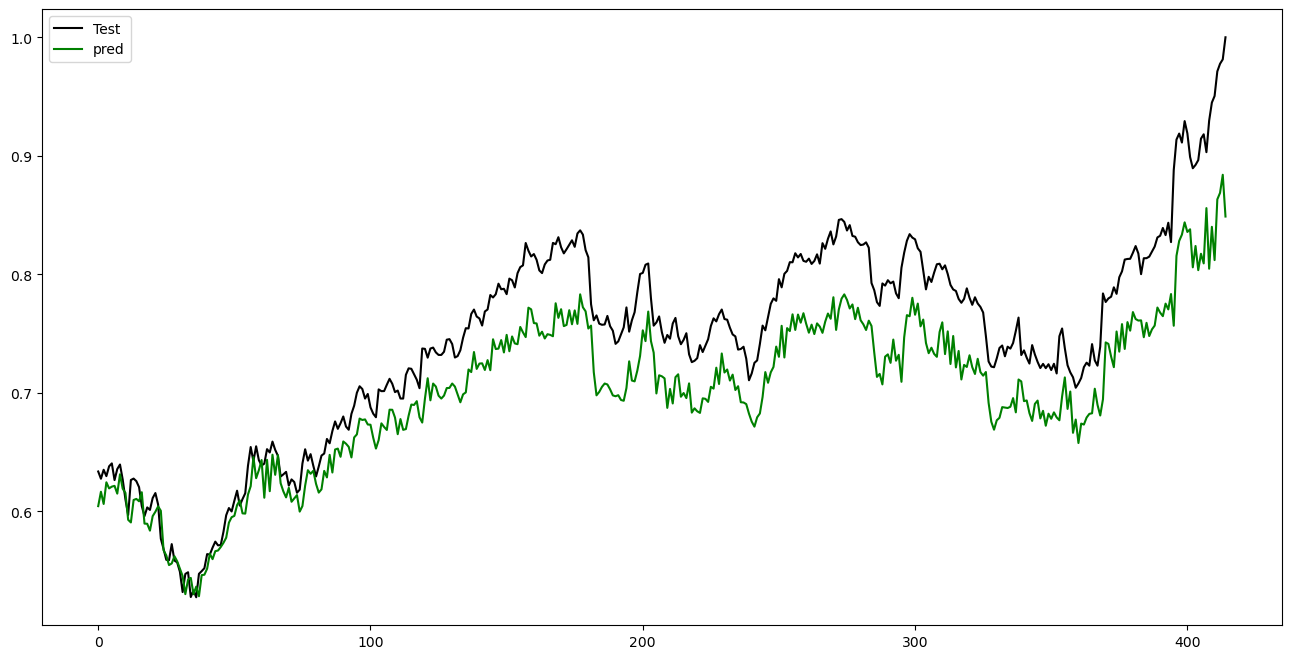

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(lstm_y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
print("MSE:", lstm_mse)

lstm_rmse = np.sqrt(lstm_mse)
print("RMSE:", lstm_rmse)

from sklearn.metrics import mean_absolute_error
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
print("MAE:", lstm_mae)

from sklearn.metrics import r2_score
lstm_r2 = r2_score(y_test, lstm_y_pred)
print("R-squared:", lstm_r2)

MSE: 0.002506259458592283
RMSE: 0.05006255545407448
MAE: 0.043926943619199854
R-squared: 0.6696115977332726


# Less Dense LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate

tf.random.set_seed(41)

batch_size = 32
epochs = 250

LD_lstm_input = Input(shape=(backcandles, 11), name='lstm_input')

inputs = LSTM(152, name='first_layer')(LD_lstm_input)
inputs = Dense(240, name='dense_layer_1', activation='tanh')(inputs)
inputs = Dense(1, name='dense_layer_output')(inputs)
LD_lstm_output = Activation('linear', name='output')(inputs)

LD_lstm_model = Model(inputs=LD_lstm_input, outputs=LD_lstm_output)

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
LD_lstm_model.compile(optimizer=optimizer, loss='mse')


LD_lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 11)]          0         
                                                                 
 first_layer (LSTM)          (None, 152)               99712     
                                                                 
 dense_layer_1 (Dense)       (None, 240)               36720     
                                                                 
 dense_layer_output (Dense)  (None, 1)                 241       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 136,673
Trainable params: 136,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LD_lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/250
105/105 [==============================] - 4s 20ms/step - loss: 8.5597e-04 - val_loss: 7.4697e-04
Epoch 2/250
105/105 [==============================] - 2s 14ms/step - loss: 5.6084e-05 - val_loss: 4.7320e-04
Epoch 3/250
105/105 [==============================] - 2s 15ms/step - loss: 5.3098e-05 - val_loss: 3.9390e-04
Epoch 4/250
105/105 [==============================] - 2s 16ms/step - loss: 6.1454e-05 - val_loss: 0.0012
Epoch 5/250
105/105 [==============================] - 2s 16ms/step - loss: 6.4481e-05 - val_loss: 8.2870e-04
Epoch 6/250
105/105 [==============================] - 2s 19ms/step - loss: 6.4010e-05 - val_loss: 3.7373e-04
Epoch 7/250
105/105 [==============================] - 3s 25ms/step - loss: 5.3515e-05 - val_loss: 3.4253e-04
Epoch 8/250
105/105 [==============================] - 2s 23ms/step - loss: 5.1096e-05 - val_loss: 3.4357e-04
Epoch 9/250
105/105 [==============================] - 2s 23ms/step - loss: 6.1620e-05 - val_loss: 0.0017
Epoch 10/250
105/1

In [ ]:
# save the model
LD_lstm_model.save('my_dir/complex_data_LD_lstm_model.h5')

In [ ]:
LD_lstm_y_pred = LD_lstm_model.predict(X_test)

for i in range(10):
    print(LD_lstm_y_pred[i], y_test[i])

13/13 [==============================] - 0s 6ms/step
[0.6133719] [0.63358061]
[0.6216752] [0.62747348]
[0.6102011] [0.63504278]
[0.6304412] [0.62966677]
[0.6271787] [0.63796732]
[0.62166125] [0.64041865]
[0.630104] [0.6263123]
[0.622112] [0.63564487]
[0.6272729] [0.63947263]
[0.62847954] [0.62674243]


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, LD_lstm_y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, LD_lstm_y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, LD_lstm_y_pred)
print("R-squared:", r2)

MSE: 0.0015624988688691505
RMSE: 0.03952845644430289
MAE: 0.033932137262499766
R-squared: 0.7940231106593748


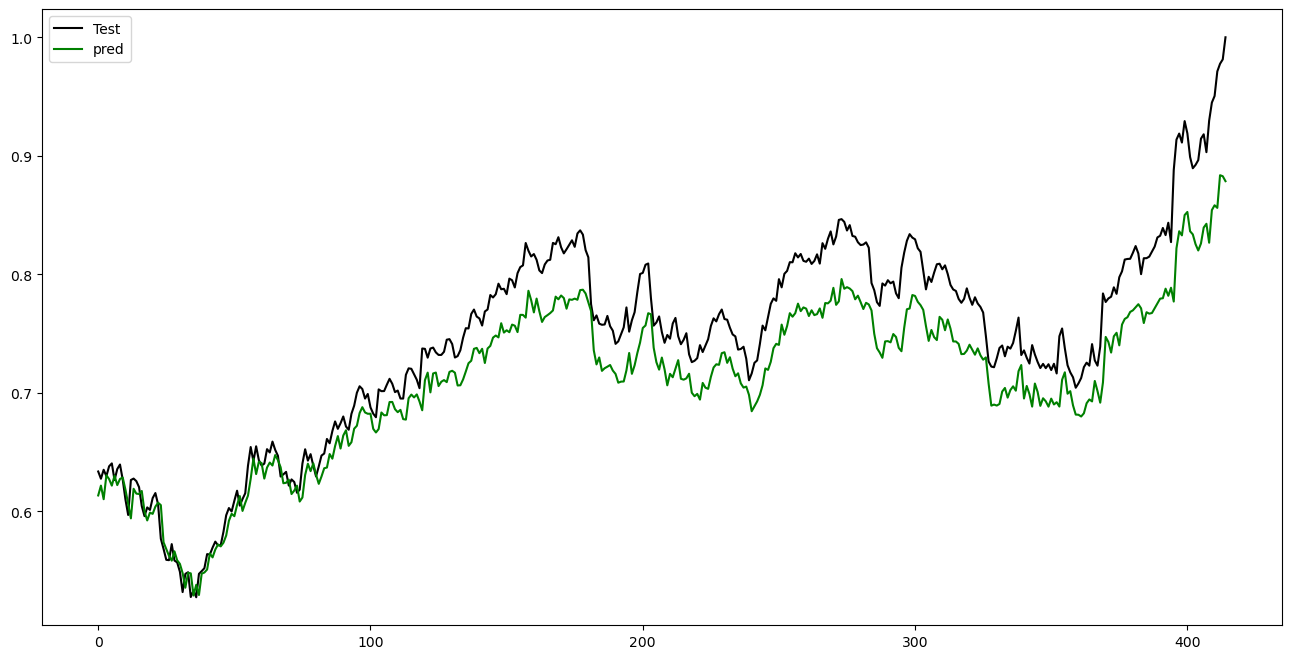

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(LD_lstm_y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

# Less Dense Bi-LSTM

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, TimeDistributed, Bidirectional, Input, Activation
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model

tf.random.set_seed(41)

batch_size = 32
epochs = 100

LD_Bi_lstm_input = Input(shape=(backcandles, 8), name='bi_lstm_input')

# Replace LSTM with Bidirectional LSTM
inputs = Bidirectional(LSTM(152, name='first_layer'))(LD_Bi_lstm_input)
inputs = Dense(240, name='dense_layer_1', activation='tanh')(inputs)
inputs = Dense(1, name='dense_layer_output')(inputs)
LD_Bi_lstm_output = Activation('linear', name='output')(inputs)

LD_Bi_lstm_model = Model(inputs=LD_Bi_lstm_input, outputs=LD_Bi_lstm_output)

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
LD_Bi_lstm_model.compile(optimizer=optimizer, loss='mse')

LD_Bi_lstm_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bi_lstm_input (InputLayer)  [(None, 21, 8)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 304)              195776    
 nal)                                                            
                                                                 
 dense_layer_1 (Dense)       (None, 240)               73200     
                                                                 
 dense_layer_output (Dense)  (None, 1)                 241       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 269,217
Trainable params: 269,217
Non-trainable params: 0
_____________________________________________________

In [11]:
LD_Bi_lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/100
111/111 [==============================] - 7s 41ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 2/100
111/111 [==============================] - 5s 46ms/step - loss: 6.3602e-05 - val_loss: 8.8231e-04
Epoch 3/100
111/111 [==============================] - 5s 43ms/step - loss: 5.2412e-05 - val_loss: 4.4644e-04
Epoch 4/100
111/111 [==============================] - 5s 42ms/step - loss: 5.3978e-05 - val_loss: 4.0408e-04
Epoch 5/100
111/111 [==============================] - 4s 40ms/step - loss: 7.6006e-05 - val_loss: 4.2834e-04
Epoch 6/100
111/111 [==============================] - 5s 43ms/step - loss: 6.7445e-05 - val_loss: 3.3052e-04
Epoch 7/100
111/111 [==============================] - 5s 43ms/step - loss: 5.4357e-05 - val_loss: 3.2463e-04
Epoch 8/100
111/111 [==============================] - 5s 43ms/step - loss: 5.0229e-05 - val_loss: 4.3238e-04
Epoch 9/100
111/111 [==============================] - 5s 41ms/step - loss: 4.8178e-05 - val_loss: 2.9348e-04
Epoch 10/100
111/1

In [ ]:
# save the model
LD_Bi_lstm_model.save('my_dir/simple_data_LD_Bi_lstm_model.h5')

In [13]:
LD_Bi_lstm_y_pred = LD_Bi_lstm_model.predict(X_test)

for i in range(10):
    print(LD_Bi_lstm_y_pred[i], y_test[i])

14/14 [==============================] - 1s 7ms/step
[0.5875889] [0.58918598]
[0.58594984] [0.56923139]
[0.57141334] [0.62094948]
[0.61227715] [0.63314634]
[0.6291903] [0.62702637]
[0.62100226] [0.63461167]
[0.63005644] [0.62922436]
[0.6281596] [0.63754239]
[0.63176864] [0.63999897]
[0.6350674] [0.62586269]


In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, LD_Bi_lstm_y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, LD_Bi_lstm_y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, LD_Bi_lstm_y_pred)
print("R-squared:", r2)

MSE: 0.00020770379347748904
RMSE: 0.014411932329756792
MAE: 0.011159924230839816
R-squared: 0.9766448476583132


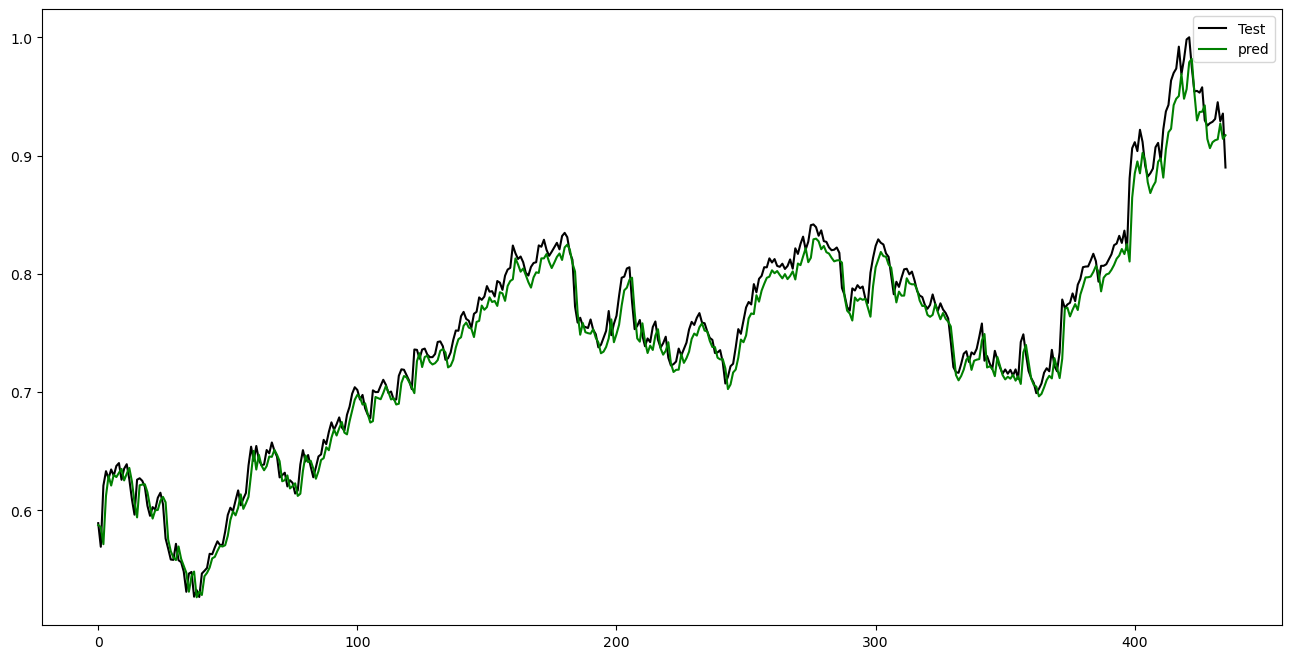

In [15]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(LD_Bi_lstm_y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

217.1312 219.86000061035156
216.41884 218.36000061035156
219.43042 222.0800018310547
216.31674 218.8000030517578
216.13693 218.24000549316406
215.74194 217.9600067138672
214.58026 217.49000549316406
216.39418 218.5399932861328
223.02992 225.00999450683594
221.7752 223.9600067138672


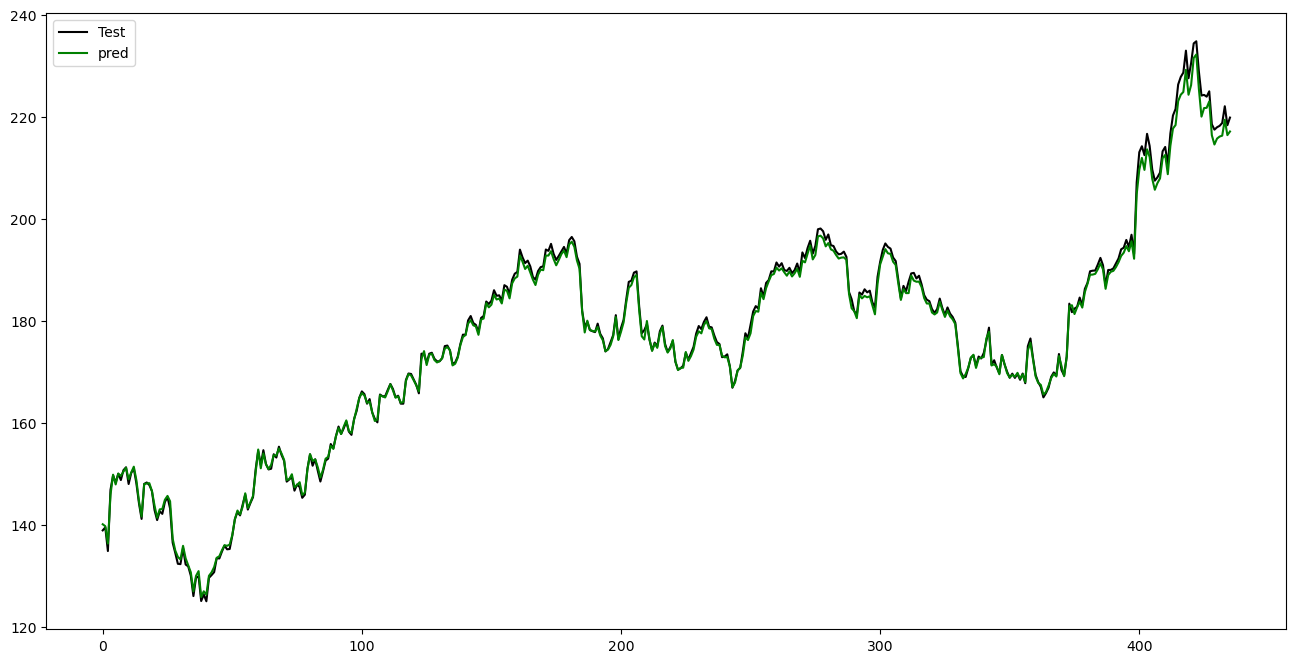

In [17]:
actualValue = [];

prediction_copies = np.repeat(LD_Bi_lstm_y_pred, data_set.shape[1], axis=-1)
y_pred_scaled_back = sc.inverse_transform(prediction_copies)[:,0]

for i in range(testSplit+1):
  actualValue.append(data_set['Close_next_day'][splitlimit+backcandles+i-1])

for i in range(10):
    print(y_pred_scaled_back[len(y_pred_scaled_back)-1-i], actualValue[len(actualValue)-1-i])

plt.figure(figsize=(16,8))
plt.plot(actualValue, color = 'black', label = 'Test')
plt.plot(y_pred_scaled_back, color = 'green', label = 'pred')
plt.legend()
plt.show()

# Dense CNN-LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, Convolution1D, MaxPooling1D, Flatten,  Embedding, Conv1D, GlobalMaxPooling1D
import numpy as np

# Define model parameters
conv_filters = 32
conv_kernel_size = 1
conv_activation = 'relu'
conv_padding = 'same'

pool_size = 1
pool_padding = 'same'

lstm_units = 150
lstm_activation = 'relu'

# time_step = 10

batch_size = 64
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# loss_function = 'mean_absolute_error'
epochs = 100

# Define the input
cnn_lstm_input = Input(shape=(backcandles, 11), name='cnn_lstm_input')

# Define the layers
cnn_lstm_conv_layer = Conv1D(filters=conv_filters, kernel_size=conv_kernel_size, activation=conv_activation, padding=conv_padding, name='conv_layer')(cnn_lstm_input)
pooling_layer = MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(cnn_lstm_conv_layer)
cnn_lstm_layer = LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(pooling_layer)
cnn_lstm_dense_layer_1 = Dense(64, activation='relu', name='dense_layer_1')(cnn_lstm_layer)
cnn_lstm_dense_layer_2 = Dense(64, activation='relu', name='dense_layer_2')(cnn_lstm_dense_layer_1)
cnn_lstm_dense_layer_3 = Dense(32, activation='relu', name='dense_layer_3')(cnn_lstm_dense_layer_2)
cnn_lstm_dense_layer_output = Dense(1, name='dense_layer_output')(cnn_lstm_dense_layer_3)
cnn_lstm_output = Activation('linear', name='output')(cnn_lstm_dense_layer_output)

# Define the model
cnn_lstm_model = Model(inputs=cnn_lstm_input, outputs=cnn_lstm_output)

# # Compile the model
# model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])

# Summary of the model
cnn_lstm_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_lstm_input (InputLayer)  [(None, 21, 11)]         0         
                                                                 
 conv_layer (Conv1D)         (None, 21, 32)            384       
                                                                 
 pooling_layer (MaxPooling1D  (None, 21, 32)           0         
 )                                                               
                                                                 
 lstm_layer (LSTM)           (None, 150)               109800    
                                                                 
 dense_layer_1 (Dense)       (None, 64)                9664      
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                           

In [ ]:
# adam = optimizers.Adam()
cnn_lstm_model.compile(optimizer=optimizer, loss='mse')
cnn_lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/100
53/53 [==============================] - 3s 23ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 2/100
53/53 [==============================] - 1s 20ms/step - loss: 8.8455e-05 - val_loss: 0.0016
Epoch 3/100
53/53 [==============================] - 1s 20ms/step - loss: 7.5281e-05 - val_loss: 5.6447e-04
Epoch 4/100
53/53 [==============================] - 1s 21ms/step - loss: 5.4147e-05 - val_loss: 0.0014
Epoch 5/100
53/53 [==============================] - 1s 22ms/step - loss: 5.3541e-05 - val_loss: 0.0019
Epoch 6/100
53/53 [==============================] - 1s 22ms/step - loss: 4.4050e-05 - val_loss: 6.1301e-04
Epoch 7/100
53/53 [==============================] - 1s 23ms/step - loss: 4.5503e-05 - val_loss: 5.6413e-04
Epoch 8/100
53/53 [==============================] - 1s 23ms/step - loss: 7.2743e-05 - val_loss: 5.8781e-04
Epoch 9/100
53/53 [==============================] - 1s 22ms/step - loss: 4.0643e-05 - val_loss: 4.1241e-04
Epoch 10/100
53/53 [============================

In [ ]:
# save the model
cnn_lstm_model.save('my_dir/complex_data_dense_cnn_lstm_model.h5')

In [ ]:
y_pred = cnn_lstm_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

13/13 [==============================] - 0s 5ms/step
[0.5895725] [0.63358061]
[0.62236243] [0.62747348]
[0.6203785] [0.63504278]
[0.6192304] [0.62966677]
[0.62339514] [0.63796732]
[0.6262366] [0.64041865]
[0.63402486] [0.6263123]
[0.62525886] [0.63564487]
[0.6229154] [0.63947263]
[0.6332141] [0.62674243]


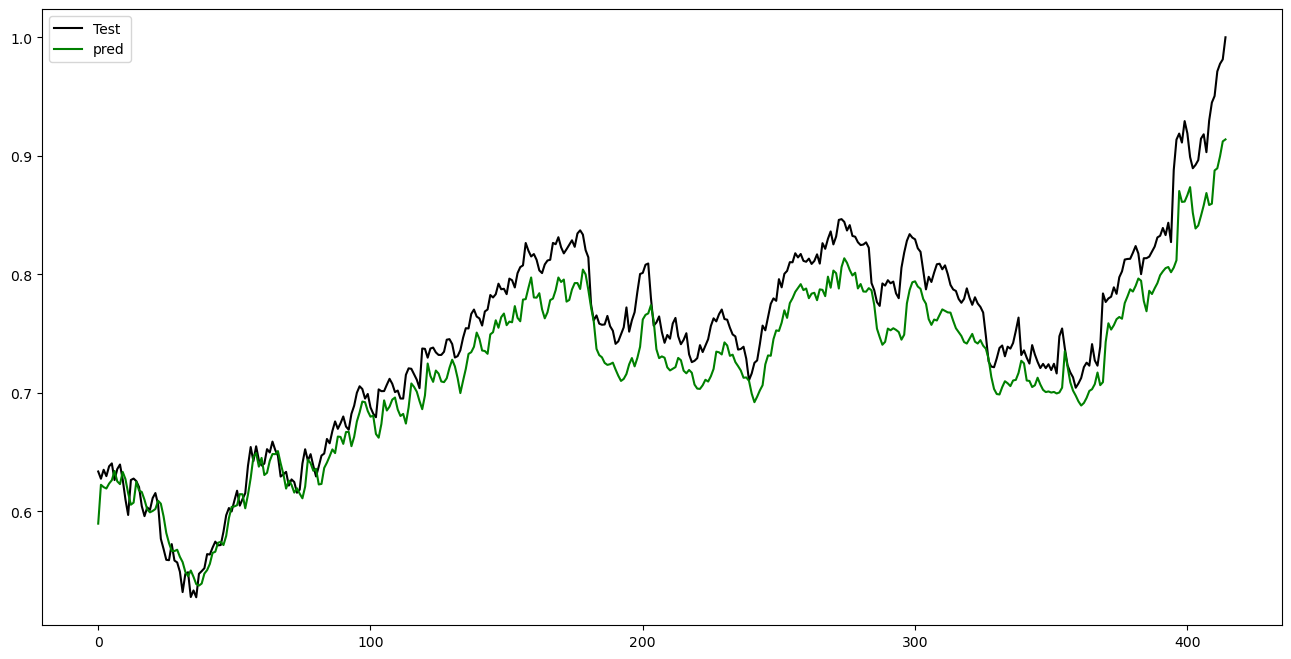

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

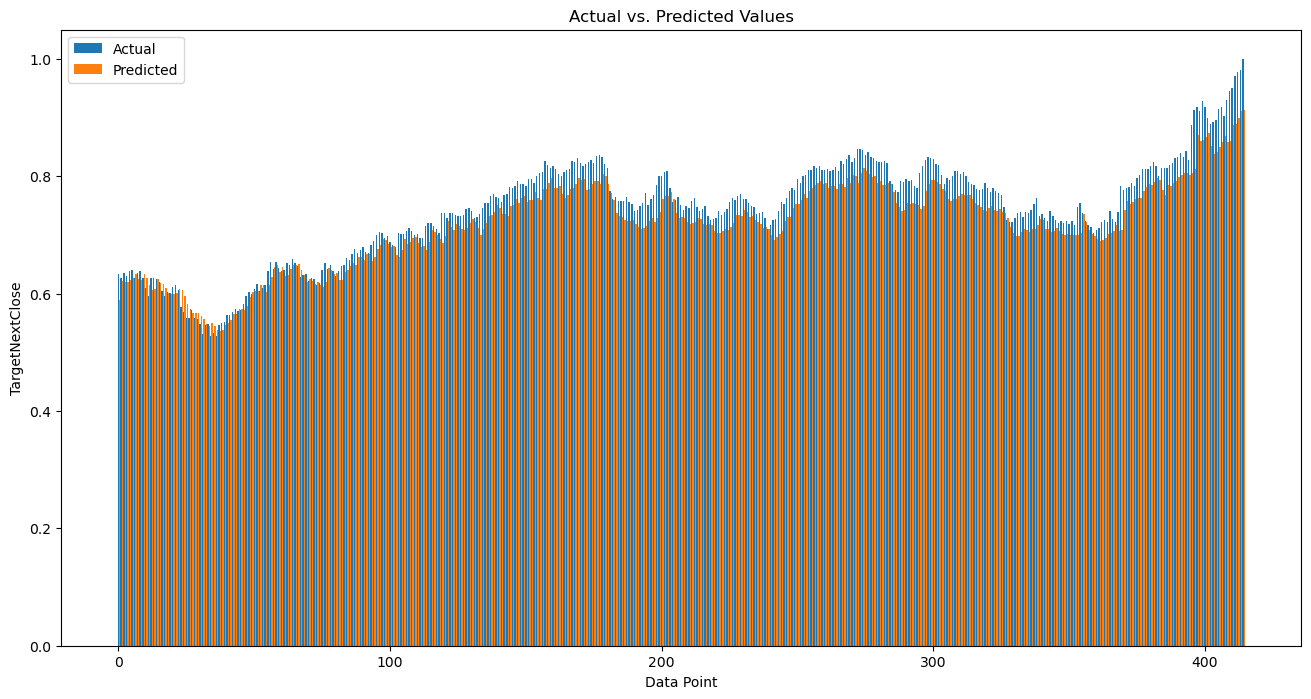

In [ ]:

# Assuming y_test and y_pred are NumPy arrays
indices = np.arange(len(y_test))  # Create an array of indices for the x-axis

# Adjust bar width as needed
bar_width = 0.5
plt.figure(figsize=(16, 8))
plt.bar(indices, y_test.flatten(), width=bar_width, label='Actual')
plt.bar(indices + bar_width, y_pred.flatten(), width=bar_width, label='Predicted')

plt.xlabel('Data Point')
plt.ylabel('TargetNextClose')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 0.000975818560070174
RMSE: 0.03123809469334156
MAE: 0.026597063865348602
R-squared: 0.8713624210751767


In [ ]:
# Assuming 'y_pred' is your NumPy array of predictions and 'data_set' is your original DataFrame
temp_df = pd.DataFrame(data_set_scaled[splitlimit+backcandles:, :-1])
temp_df['Predictions'] = y_pred
temp_df_scaled_back = sc.inverse_transform(temp_df)  # Scale back the temporary DataFrame
y_pred_scaled_back = temp_df_scaled_back[:, -1]  # Extract the scaled back predictions

# Less dense CNN-LSTM

In [ ]:
# Define Attention Layer
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = tf.reduce_sum(x * tf.expand_dims(a, -1), axis=1)
        return output

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, initializers
# Model parameters
conv_filters = 128
conv_kernel_size = 1
conv_activation = 'tanh'
conv_padding = 'same'

pool_size = 1
pool_padding = 'same'

lstm_units = 176
lstm_activation = 'tanh'

dense_layer1 = 64

time_step = backcandles
features = 11

batch_size = 128
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_function = 'mean_absolute_error'
epochs = 200

# Define initializers
weight_initializer = initializers.GlorotUniform()
bias_initializer = initializers.Zeros()

# Define the input
lstm_input = Input(shape=(time_step, features), name='lstm_input')

# Define the layers with initializers
conv_layer = layers.Conv1D(filters=conv_filters, kernel_size=conv_kernel_size,
                           activation=conv_activation, padding=conv_padding,
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer, name='conv_layer')(lstm_input)
# pooling_layer = layers.MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(conv_layer)
lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation,
                         kernel_initializer=weight_initializer,
                         bias_initializer=bias_initializer, name='lstm_layer')(conv_layer) # pooling_layer
dense_layer = layers.Dense(dense_layer1, name='dense_layer',
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer)(lstm_layer)
# output = layers.Activation('linear', name='output')(dense_layer)
output = layers.Dense(1, activation='linear', name='output')(dense_layer)
# Define the model
less_dense_lstm_cnn_model = Model(inputs=lstm_input, outputs=output)

# Compile the model
less_dense_lstm_cnn_model.compile(optimizer=optimizer, loss=['mse'])

# Summary of the model
less_dense_lstm_cnn_model.summary()

# Assuming you have training data in `X_train` and `y_train`
# Here X_train and y_train are placeholders, replace with your actual data
# X_train = scaled_data
# y_train = np.random.rand(1000, 1)  # Replace with your actual labels

# You can fit the model with:
# model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Model: "model_3"


C:\Users\mudit\anaconda3\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 11)]          0         
                                                                 
 conv_layer (Conv1D)         (None, 21, 128)           1536      
                                                                 
 lstm_layer (LSTM)           (None, 176)               214720    
                                                                 
 dense_layer (Dense)         (None, 64)                11328     
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 227,649
Trainable params: 227,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
less_dense_lstm_cnn_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/200
27/27 [==============================] - 3s 55ms/step - loss: 0.6398 - val_loss: 0.0175
Epoch 2/200
27/27 [==============================] - 1s 41ms/step - loss: 0.0059 - val_loss: 0.0251
Epoch 3/200
27/27 [==============================] - 1s 43ms/step - loss: 7.3507e-04 - val_loss: 0.0166
Epoch 4/200
27/27 [==============================] - 1s 44ms/step - loss: 3.3505e-04 - val_loss: 0.0062
Epoch 5/200
27/27 [==============================] - 2s 70ms/step - loss: 2.7627e-04 - val_loss: 0.0074
Epoch 6/200
27/27 [==============================] - 2s 72ms/step - loss: 2.2808e-04 - val_loss: 0.0065
Epoch 7/200
27/27 [==============================] - 2s 71ms/step - loss: 1.9138e-04 - val_loss: 0.0055
Epoch 8/200
27/27 [==============================] - 2s 69ms/step - loss: 1.7536e-04 - val_loss: 0.0058
Epoch 9/200
27/27 [==============================] - 2s 69ms/step - loss: 1.5392e-04 - val_loss: 0.0069
Epoch 10/200
27/27 [==============================] - 2s 71ms/step - los

In [ ]:
# save the model
less_dense_lstm_cnn_model.save('my_dir/complex_data_LD_cnn_lstm_model.h5')

13/13 [==============================] - 0s 8ms/step
[0.5776869] [0.63358061]
[0.5962643] [0.62747348]
[0.5978421] [0.63504278]
[0.60486525] [0.62966677]
[0.60629624] [0.63796732]
[0.6067805] [0.64041865]
[0.6070106] [0.6263123]
[0.6073531] [0.63564487]
[0.6053273] [0.63947263]
[0.60868454] [0.62674243]


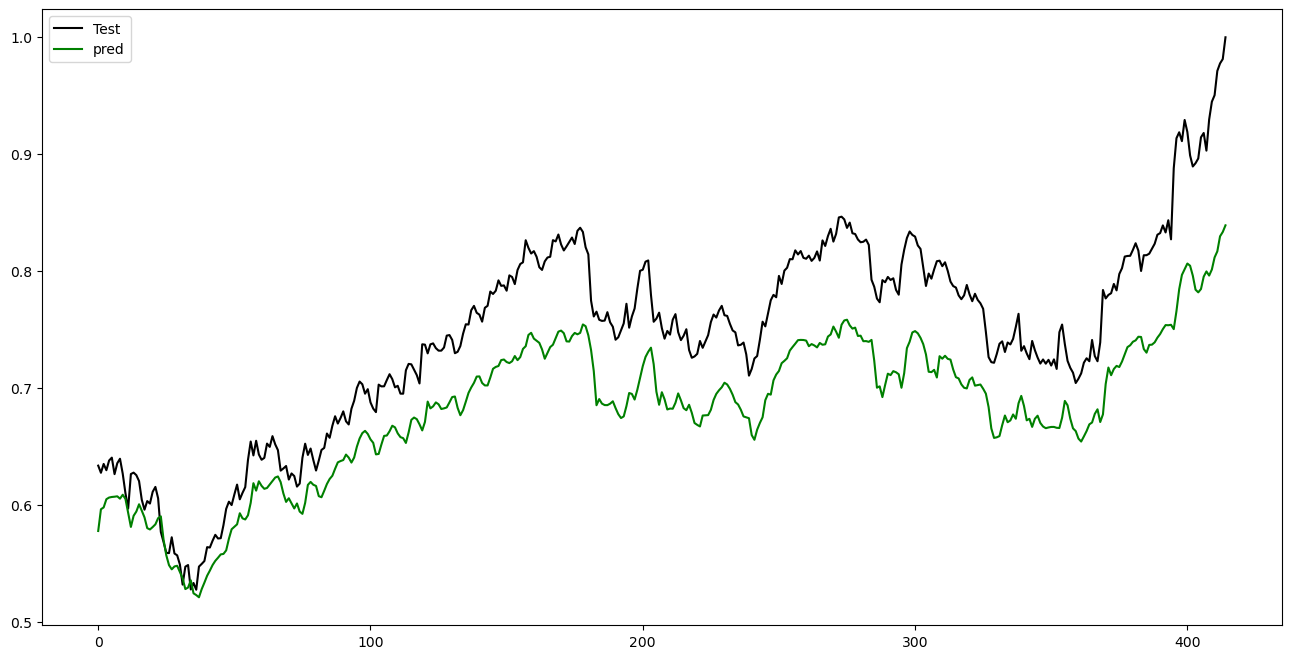

In [ ]:
y_pred = less_dense_lstm_cnn_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 0.00447818253859527
RMSE: 0.06691922398380953
MAE: 0.06100087793226663
R-squared: 0.4096622227528771


In [ ]:
y_pred_original_scale = sc.inverse_transform(y_pred[], y_pred[:, -1])

# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, initializers

# Model parameters
conv_filters = 192
conv_kernel_size = 3
conv_activation = 'tanh'
conv_padding = 'same'

pool_size = 2
pool_padding = 'same'

dense_layer1 = 96

time_step = backcandles
features = 11

batch_size = 128
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_function = 'mean_absolute_error'
epochs = 500

# Define initializers
weight_initializer = initializers.GlorotUniform()
bias_initializer = initializers.Zeros()

# Define the input
cnn_input = Input(shape=(time_step, features), name='cnn_input')

# Define the layers with initializers
conv_layer = layers.Conv1D(filters=conv_filters, kernel_size=conv_kernel_size,
                           activation=conv_activation, padding=conv_padding,
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer, name='conv_layer')(cnn_input)
# pooling_layer = layers.MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(conv_layer)
flatten_layer = layers.Flatten()(conv_layer)
dense_layer = layers.Dense(dense_layer1, name='dense_layer',
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer)(flatten_layer)
# output = layers.Activation('linear', name='output')(dense_layer)
output = layers.Dense(1, activation='linear', name='output')(dense_layer)

# Define the model
cnn_model = Model(inputs=cnn_input, outputs=output)

# Compile the model
cnn_model.compile(optimizer=optimizer, loss=loss_function)

# Summary of the model
cnn_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_input (InputLayer)      [(None, 21, 11)]          0         
                                                                 
 conv_layer (Conv1D)         (None, 21, 192)           6528      
                                                                 
 flatten (Flatten)           (None, 4032)              0         
                                                                 
 dense_layer (Dense)         (None, 96)                387168    
                                                                 
 output (Dense)              (None, 1)                 97        
                                                                 
Total params: 393,793
Trainable params: 393,793
Non-trainable params: 0
_________________________________________________________________


C:\Users\mudit\anaconda3\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
cnn_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/500
27/27 [==============================] - 1s 18ms/step - loss: 0.5651 - val_loss: 0.3125
Epoch 2/500
27/27 [==============================] - 0s 12ms/step - loss: 0.0788 - val_loss: 0.1072
Epoch 3/500
27/27 [==============================] - 0s 11ms/step - loss: 0.0273 - val_loss: 0.0486
Epoch 4/500
27/27 [==============================] - 0s 10ms/step - loss: 0.0148 - val_loss: 0.0438
Epoch 5/500
27/27 [==============================] - 0s 10ms/step - loss: 0.0172 - val_loss: 0.0218
Epoch 6/500
27/27 [==============================] - 0s 10ms/step - loss: 0.0207 - val_loss: 0.1806
Epoch 7/500
27/27 [==============================] - 0s 10ms/step - loss: 0.0166 - val_loss: 0.0426
Epoch 8/500
27/27 [==============================] - 0s 12ms/step - loss: 0.0156 - val_loss: 0.0473
Epoch 9/500
27/27 [==============================] - 0s 13ms/step - loss: 0.0200 - val_loss: 0.0266
Epoch 10/500
27/27 [==============================] - 0s 10ms/step - loss: 0.0142 - val_loss: 0.0170

In [ ]:
# save the model
cnn_model.save('my_dir/complex_data_LD_cnn_model.h5')

13/13 [==============================] - 0s 2ms/step
[0.6172432] [0.63358061]
[0.63034] [0.62747348]
[0.6201639] [0.63504278]
[0.6307086] [0.62966677]
[0.6342265] [0.63796732]
[0.6350163] [0.64041865]
[0.637206] [0.6263123]
[0.62423915] [0.63564487]
[0.6393599] [0.63947263]
[0.6367212] [0.62674243]


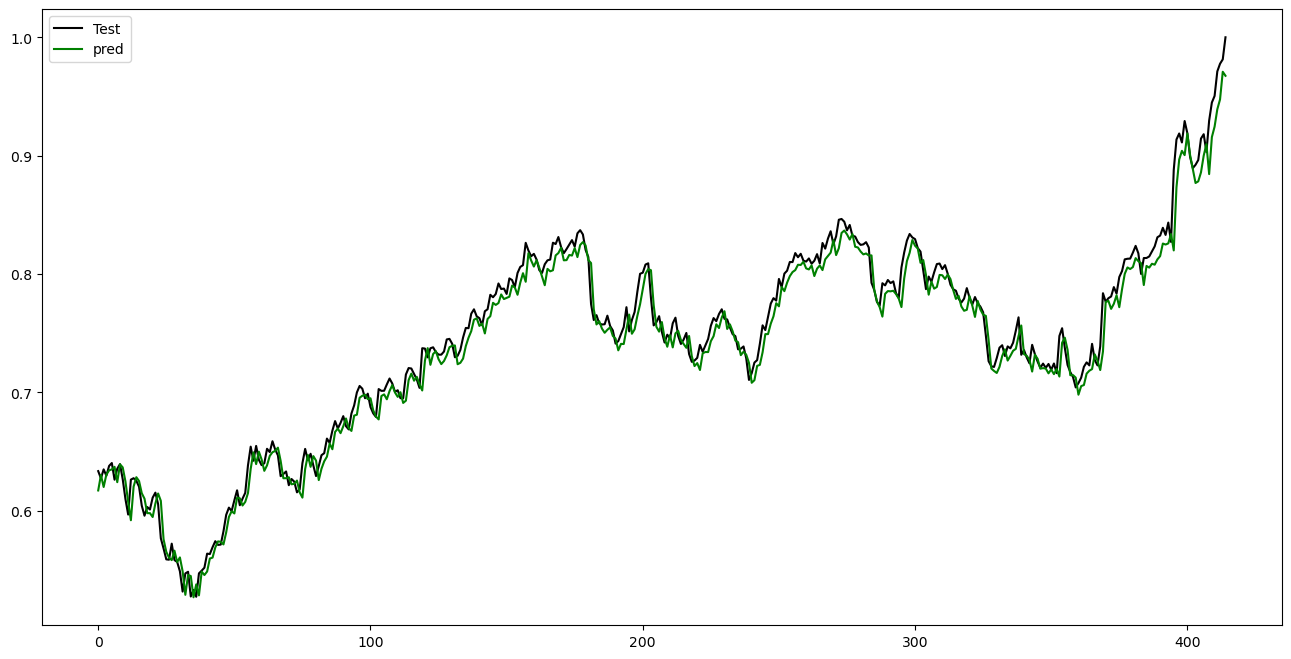

In [ ]:
y_pred = cnn_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 0.00017500745595543053
RMSE: 0.013229038360947878
MAE: 0.010132497389888254
R-squared: 0.9769295888097473


# Less dense CNN-LSTM-AM

In [ ]:
from tensorflow.keras import layers

# Define Attention Layer
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=[2, 0]) + self.b)
        a = tf.nn.softmax(e, axis=1)
        a = tf.expand_dims(a, axis=-1)
        output = tf.reduce_sum(x * a, axis=1)
        return output

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, initializers

# Model parameters
conv_filters = 128
conv_kernel_size = 1
conv_activation = 'tanh'
conv_padding = 'same'

pool_size = 1
pool_padding = 'same'

lstm_units = 176
lstm_activation = 'tanh'

dense_layer1 = 64

time_step = backcandles
features = 11

batch_size = 128
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_function = 'mean_absolute_error'
epochs = 100

# Define initializers
weight_initializer = initializers.GlorotUniform()
bias_initializer = initializers.Zeros()

# Define the input
lstm_input = Input(shape=(time_step, features), name='lstm_input')


# Define the layers with initializers
conv_layer = layers.Conv1D(filters=conv_filters, kernel_size=conv_kernel_size,
                           activation=conv_activation, padding=conv_padding,
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer, name='conv_layer')(lstm_input)
# pooling_layer = layers.MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(conv_layer)
lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation,
                         kernel_initializer=weight_initializer,
                         bias_initializer=bias_initializer, name='lstm_layer')(conv_layer) # pooling_layer
# Attention layer
attention_output = AttentionLayer(name='attention_layer')(lstm_layer)

dense_layer = layers.Dense(dense_layer1, name='dense_layer',
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer)(attention_output)
# output = layers.Activation('linear', name='output')(dense_layer)
output = layers.Dense(1, activation='linear', name='output')(dense_layer)
# Define the model
less_dense_lstm_cnn_model = Model(inputs=lstm_input, outputs=output)

# Compile the model
less_dense_lstm_cnn_model.compile(optimizer=optimizer, loss=['mse'])

# Summary of the model
less_dense_lstm_cnn_model.summary()


StagingError: Exception encountered when calling layer "attention_layer" (type AttentionLayer).

in user code:

    File "C:\Users\mudit\AppData\Local\Temp\ipykernel_43856\2801416046.py", line 16, in call  *
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=[2, 0]) + self.b)

    IndexError: list index out of range


Call arguments received by layer "attention_layer" (type AttentionLayer):
  • x=tf.Tensor(shape=(None, 176), dtype=float32)

In [ ]:
less_dense_lstm_cnn_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/model_2/attention_layer/mul/BroadcastGradientArgs' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\mudit\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\mudit\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\mudit\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\mudit\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\mudit\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\mudit\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\mudit\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\mudit\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\mudit\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\mudit\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\mudit\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\mudit\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\mudit\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\mudit\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\mudit\AppData\Local\Temp\ipykernel_6608\201545159.py", line 1, in <module>
      less_dense_lstm_cnn_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\optimizers\optimizer.py", line 542, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\optimizers\optimizer.py", line 275, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/model_2/attention_layer/mul/BroadcastGradientArgs'
Incompatible shapes: [128,176] vs. [128,176,1]
	 [[{{node gradient_tape/model_2/attention_layer/mul/BroadcastGradientArgs}}]] [Op:__inference_train_function_8720]

In [ ]:
# save the model
less_dense_lstm_cnn_model.save('my_dir/complex_data_LD_cnn_lstm_model.h5')

13/13 [==============================] - 0s 8ms/step
[0.5776869] [0.63358061]
[0.5962643] [0.62747348]
[0.5978421] [0.63504278]
[0.60486525] [0.62966677]
[0.60629624] [0.63796732]
[0.6067805] [0.64041865]
[0.6070106] [0.6263123]
[0.6073531] [0.63564487]
[0.6053273] [0.63947263]
[0.60868454] [0.62674243]


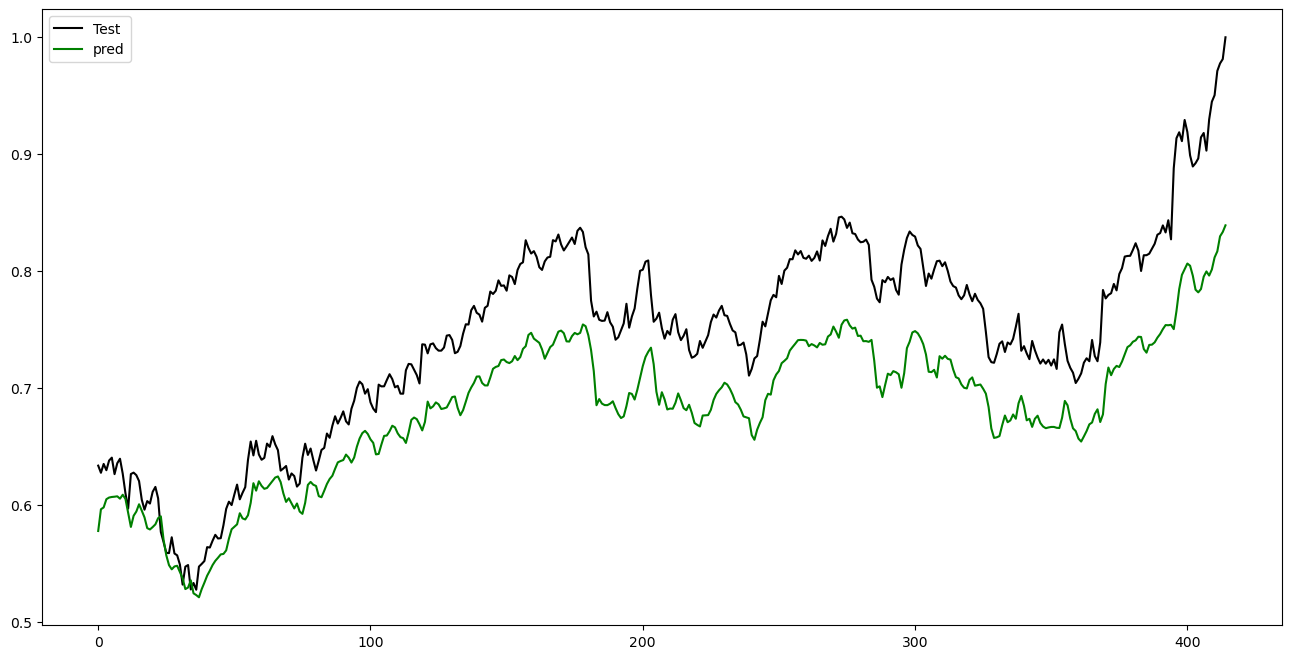

In [ ]:
y_pred = less_dense_lstm_cnn_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 0.00447818253859527
RMSE: 0.06691922398380953
MAE: 0.06100087793226663
R-squared: 0.4096622227528771


In [ ]:
y_pred_original_scale = sc.inverse_transform(y_pred[], y_pred[:, -1])

# Less dense K-fold CNN-LSTM

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, initializers
from keras.callbacks import History
# from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

batch_size = 128
# epochs = 5
# k = 18  # Number of folds
# kf = KFold(n_splits=k, shuffle=True, random_state=41)

def createModel():

  # Model parameters
  conv_filters = 128
  conv_kernel_size = 1
  conv_activation = 'tanh'
  conv_padding = 'same'

  pool_size = 1
  pool_padding = 'same'

  lstm_units = 176
  lstm_activation = 'tanh'

  dense_layer1 = 64

  time_step = backcandles
  features = 8

  # batch_size = 128
  learning_rate = 0.01
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  loss_function = 'mean_absolute_error'

  # Define initializers
  weight_initializer = initializers.GlorotUniform()
  bias_initializer = initializers.Zeros()

  # Define the input
  lstm_input = Input(shape=(time_step, features), name='lstm_input')

  # Define the layers with initializers
  conv_layer = layers.Conv1D(filters=conv_filters, kernel_size=conv_kernel_size,
                            activation=conv_activation, padding=conv_padding,
                            kernel_initializer=weight_initializer,
                            bias_initializer=bias_initializer, name='conv_layer')(lstm_input)
  # pooling_layer = layers.MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(conv_layer)
  lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation,
                          kernel_initializer=weight_initializer,
                          bias_initializer=bias_initializer, name='lstm_layer')(conv_layer) # pooling_layer
  dense_layer = layers.Dense(dense_layer1, name='dense_layer',
                            kernel_initializer=weight_initializer,
                            bias_initializer=bias_initializer)(lstm_layer)
  # output = layers.Activation('linear', name='output')(dense_layer)
  output = layers.Dense(1, activation='linear', name='output')(dense_layer)
  # Define the model
  less_dense_lstm_cnn_model = Model(inputs=lstm_input, outputs=output)

  # Compile the model
  less_dense_lstm_cnn_model.compile(optimizer=optimizer, loss=['mse'])

  # Summary of the model
  less_dense_lstm_cnn_model.summary()

  return less_dense_lstm_cnn_model;

In [11]:
from keras.wrappers.scikit_learn import KerasRegressor

# Wrap the model using the KerasRegressor
model = KerasRegressor(build_fn=createModel, epochs=50, batch_size=128, verbose=1)

# Define the k-fold cross-validator
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=41)

# Evaluate the model using cross-validation
results = cross_val_score(model, X_train, y_train, cv=kf)

print("Cross-validation scores:", results)
print("Mean cross-validation score:", np.mean(results))

C:\Users\mudit\AppData\Local\Temp\ipykernel_30976\2451683266.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=createModel, epochs=50, batch_size=128, verbose=1)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 8)]           0         
                                                                 
 conv_layer (Conv1D)         (None, 21, 128)           1152      
                                                                 
 lstm_layer (LSTM)           (None, 176)               214720    
                                                                 
 dense_layer (Dense)         (None, 64)                11328     
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 227,265
Trainable params: 227,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 6

In [ ]:

# K-Fold Cross Validation
fold_no = 1
less_dense_lstm_cnn_model = ''
histories = []
for train_index, val_index in kf.split(X_train):
    print(f'Training fold {fold_no}...')
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Create a new model instance
    less_dense_lstm_cnn_model = createModel()
    less_dense_lstm_cnn_model.summary()

    # Train the model
    history = less_dense_lstm_cnn_model.fit(
        x=X_train_fold,
        y=y_train_fold,
        batch_size=batch_size,
        epochs=epochs,
        shuffle=True,
        validation_data=(X_val_fold, y_val_fold)
    )
    histories.append(history)

    fold_no += 1

# less_dense_lstm_cnn_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

In [22]:
less_dense_lstm_cnn_model = createModel();
less_dense_lstm_cnn_model.fit(x=X_train, y=y_train, batch_size=128, epochs=150, shuffle=True, validation_split = 0.1)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 8)]           0         
                                                                 
 conv_layer (Conv1D)         (None, 21, 128)           1152      
                                                                 
 lstm_layer (LSTM)           (None, 176)               214720    
                                                                 
 dense_layer (Dense)         (None, 64)                11328     
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 227,265
Trainable params: 227,265
Non-trainable params: 0
_________________________________________________________________


C:\Users\mudit\anaconda3\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
28/28 [==============================] - 3s 55ms/step - loss: 0.5481 - val_loss: 0.0277
Epoch 2/150
28/28 [==============================] - 1s 42ms/step - loss: 0.0034 - val_loss: 0.0051
Epoch 3/150
28/28 [==============================] - 1s 44ms/step - loss: 8.8260e-04 - val_loss: 0.0020
Epoch 4/150
28/28 [==============================] - 1s 42ms/step - loss: 3.9439e-04 - val_loss: 0.0016
Epoch 5/150
28/28 [==============================] - 1s 44ms/step - loss: 2.3707e-04 - val_loss: 0.0016
Epoch 6/150
28/28 [==============================] - 1s 43ms/step - loss: 2.1496e-04 - val_loss: 0.0013
Epoch 7/150
28/28 [==============================] - 1s 44ms/step - loss: 1.6678e-04 - val_loss: 0.0013
Epoch 8/150
28/28 [==============================] - 1s 43ms/step - loss: 1.3277e-04 - val_loss: 0.0014
Epoch 9/150
28/28 [==============================] - 1s 44ms/step - loss: 1.2487e-04 - val_loss: 0.0011
Epoch 10/150
28/28 [==============================] - 1s 45ms/step - los

In [ ]:
# save the model
less_dense_lstm_cnn_model.save('my_dir/complex_data_LD_cnn_lstm_model.h5')

In [8]:
from keras.models import load_model

# Load the model
less_dense_lstm_cnn_model = load_model('my_dir/simple_data_LD_cnn_lstm_model.h5')

C:\Users\mudit\anaconda3\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


14/14 [==============================] - 0s 6ms/step
[0.5947218] [0.58918598]
[0.59346247] [0.56923139]
[0.58201873] [0.62094948]
[0.61758393] [0.63314634]
[0.6233313] [0.62702637]
[0.63282585] [0.63461167]
[0.6297362] [0.62922436]
[0.63710415] [0.63754239]
[0.6366284] [0.63999897]
[0.64056134] [0.62586269]


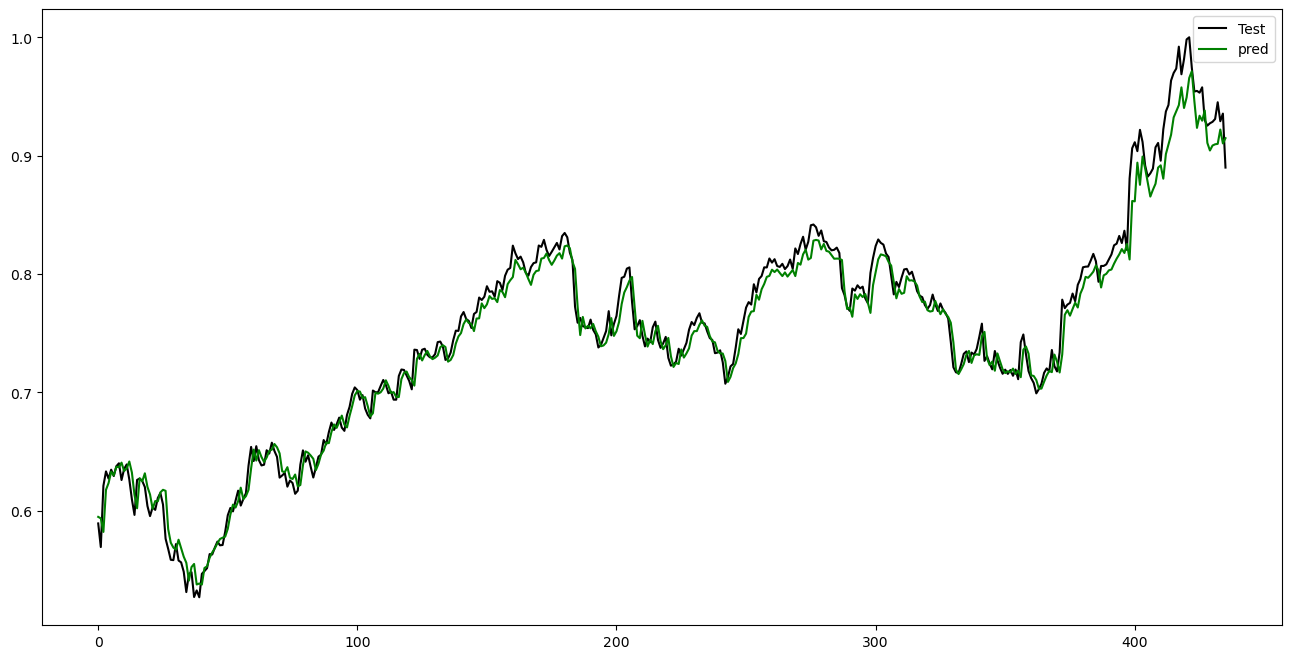

In [9]:
y_pred = less_dense_lstm_cnn_model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [12]:
actualValue = [];

prediction_copies = np.repeat(y_pred, data_set.shape[1], axis=-1)
y_pred_scaled_back = sc.inverse_transform(prediction_copies)[:,0]

for i in range(testSplit+1):
  actualValue.append(data_set['Close_next_day'][splitlimit+backcandles+i-1])

for i in range(10):
    print(y_pred_scaled_back[len(y_pred_scaled_back)-1-i], actualValue[len(actualValue)-1-i])

plt.figure(figsize=(16,8))
plt.plot(actualValue, color = 'black', label = 'Test')
plt.plot(y_pred_scaled_back, color = 'green', label = 'pred')
plt.legend()
plt.show()

NameError: name 'y_pred' is not defined

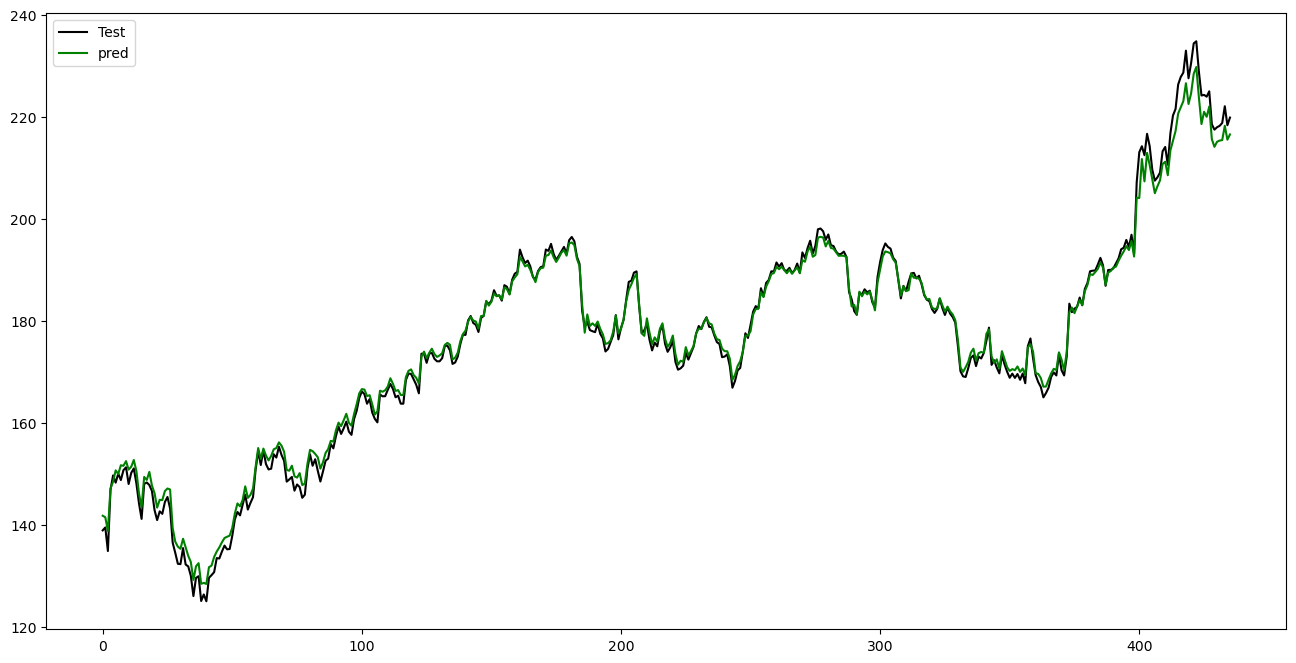

In [35]:
plt.figure(figsize=(16,8))
plt.plot(actualValue, color = 'black', label = 'Test')
plt.plot(y_pred_scaled_back, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 0.00020640006045161586
RMSE: 0.014366630100744428
MAE: 0.010535489471535655
R-squared: 0.9767914452862253


# Hypertuning parameters Dense CNN-LSTM

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Input, Model
import keras_tuner as kt
batch_size = 128

def build_model(hp):

    features = 11
    time_step = 21 # hp.Choice('time_step', values=[7, 14, 21, 28, 35])
    batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128, 256, 512])

    conv_filters = hp.Int('conv_filters', min_value=16, max_value=256, step=8)
    conv_kernel_size = hp.Int('conv_kernel_size', min_value=1, max_value=5, step=1)
    conv_activation = hp.Choice('conv_activation', values=['relu', 'tanh'])
    conv_padding = 'same'

    pool_size = 1
    pool_padding = 'same'

    # Model parameters with hyperparameter options
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=256, step=8)

    lstm_activation = hp.Choice('lstm_activation', values=['relu', 'tanh'])
    dense_layer1_activation = hp.Choice('dense_layer1_activation', values=['relu', 'tanh'])
    dense_layer2_activation = hp.Choice('dense_layer2_activation', values=['relu', 'tanh'])
    dense_layer3_activation = hp.Choice('dense_layer3_activation', values=['relu', 'tanh'])

    dense_units_layer1 = hp.Int('dense_units_layer1', min_value=16, max_value=128, step=16)
    dense_units_layer2 = hp.Int('dense_units_layer2', min_value=16, max_value=128, step=16)
    dense_units_layer3 = hp.Int('dense_units_layer3', min_value=16, max_value=128, step=16)

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define the input
    lstm_input = Input(shape=(time_step, features), name='lstm_input')

    # Define the layers with initializers
    conv_layer = layers.Conv1D(filters=conv_filters,
                               kernel_size=conv_kernel_size,
                               activation=conv_activation,
                               padding=conv_padding,
                               name='conv_layer')(lstm_input)
    pooling_layer = layers.MaxPooling1D(pool_size=pool_size,
                                padding=pool_padding,
                                name='pooling_layer')(conv_layer)
    lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(lstm_input)
    dense_layer1 = layers.Dense(dense_units_layer1, activation=dense_layer1_activation, name='dense_layer_layer1')(lstm_layer)
    dense_layer2 = layers.Dense(dense_units_layer2, activation=dense_layer2_activation, name='dense_layer_layer2')(dense_layer1)
    dense_layer3 = layers.Dense(dense_units_layer3, activation=dense_layer3_activation, name='dense_layer_layer3')(dense_layer2)
    output = layers.Dense(1, activation='linear', name='output')(dense_layer3)

    # Define the model
    model = Model(inputs=lstm_input, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_absolute_error',
                  metrics=['mae'])

    return model


In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_mae',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='CD_dense_lstm_hyperparameter_tuning-1')

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

tuner.search(X_train, y_train, epochs=500, batch_size=batch_size, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
the optimal number of bath_size is {best_hps.get('batch_size')},
the optimal number of units in the LSTM layer is {best_hps.get('lstm_units')},
The optimal number of filters in the convolutional layer is {best_hps.get('conv_filters')},
The optimal number of convolution kernal is {best_hps.get('conv_kernel_size')},
the optimal number of convolution activation unit is {best_hps.get('conv_activation')},
the optimal number of units in the dense layer 1 is {best_hps.get('dense_units_layer1')},
the optimal number of units in the dense layer 2 is {best_hps.get('dense_units_layer2')},
the optimal number of units in the dense layer 3 is {best_hps.get('dense_units_layer3')},
the optimal number of lstm activation unit is {best_hps.get('lstm_activation')},
the optimal number of dense layer 1 activation unit is {best_hps.get('dense_layer1_activation')},
the optimal number of dense layer 2 activation unit is {best_hps.get('dense_layer2_activation')},
the optimal number of dense layer 3 activation unit is {best_hps.get('dense_layer3_activation')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


Trial 725 Complete [00h 00m 26s]
val_mae: 0.015320426784455776

Best val_mae So Far: 0.012591605074703693
Total elapsed time: 02h 06m 01s

the optimal number of bath_size is 16,
the optimal number of units in the LSTM layer is 208,
The optimal number of filters in the convolutional layer is 208,
The optimal number of convolution kernal is 2,
the optimal number of convolution activation unit is relu,
the optimal number of units in the dense layer 1 is 32,
the optimal number of units in the dense layer 2 is 128,
the optimal number of units in the dense layer 3 is 64,
the optimal number of lstm activation unit is tanh,
the optimal number of dense layer 1 activation unit is relu,
the optimal number of dense layer 2 activation unit is relu,
the optimal number of dense layer 3 activation unit is relu,
and the optimal learning rate for the optimizer is 0.001.



# Hypertuning parameters less Dense CNN-LSTM

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, initializers
import keras_tuner as kt
batch_size = 32

def ld_cnn_lstm_build_model(hp):

    features = 11
    time_step = 21 # hp.Choice('time_step', values=[7, 14, 21, 28, 35])
    batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128, 256, 512])
    # Model parameters with hyperparameter options
    conv_filters = hp.Int('conv_filters', min_value=16, max_value=256, step=8)
    conv_kernel_size = hp.Int('conv_kernel_size', min_value=1, max_value=5, step=1)
    conv_activation = hp.Choice('conv_activation', values=['relu', 'tanh'])
    conv_padding = 'same'

    pool_size = 1
    pool_padding = 'same'

    lstm_units = hp.Int('lstm_units', min_value=16, max_value=256, step=8)
    lstm_activation = hp.Choice('lstm_activation', values=['relu', 'tanh'])

    dense_units = hp.Int('dense_units', min_value=16, max_value=256, step=8)

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define initializers
    weight_initializer = initializers.GlorotUniform()
    bias_initializer = initializers.Zeros()

    # Define the input
    lstm_input = Input(shape=(time_step, features), name='lstm_input')

    # Define the layers with initializers
    conv_layer = layers.Conv1D(filters=conv_filters,
                               kernel_size=conv_kernel_size,
                               activation=conv_activation,
                               padding=conv_padding,
                               name='conv_layer')(lstm_input)
    pooling_layer = layers.MaxPooling1D(pool_size=pool_size,
                                padding=pool_padding,
                                name='pooling_layer')(conv_layer)
    lstm_layer = layers.LSTM(lstm_units,
                             activation=lstm_activation,
                             name='lstm_layer')(pooling_layer)
    dense_layer = layers.Dense(dense_units,
                               activation='relu',
                               name='dense_layer')(lstm_layer)
    output = layers.Dense(1, activation='linear', name='output')(dense_layer)

    # Define the model
    model = Model(inputs=lstm_input, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_absolute_error',
                  metrics=['mae'])

    return model


In [ ]:
tuner_ld_cnn_lstm_build_model = kt.Hyperband(ld_cnn_lstm_build_model,
                     objective='val_mae',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='CD_cnn_lstm_hyperparameter_tuning-1')

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

tuner_ld_cnn_lstm_build_model.search(X_train, y_train, epochs=500, batch_size=batch_size, validation_split=0.1, callbacks=[stop_early])




Trial 3 Complete [00h 00m 07s]
val_mae: 0.03789419308304787

Best val_mae So Far: 0.016190966591238976
Total elapsed time: 00h 23m 26s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
256               |512               |batch_size
232               |48                |conv_filters
2                 |5                 |conv_kernel_size
relu              |tanh              |conv_activation
200               |200               |lstm_units
relu              |relu              |lstm_activation
32                |88                |dense_units
0.0001            |0.001             |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
5                 |5                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
105/105 [==============================] - 10s 83ms/step - loss: 0.0314 - mae: 0.0314 - val_loss: 0.0683 - val_mae: 0.0683
Epoch 2/3
 85/105 [=======

KeyboardInterrupt: 

In [ ]:
# Get the optimal hyperparameters
cd_ld_cnn_lstm_best_hps = tuner_ld_cnn_lstm_build_model.get_best_hyperparameters(num_trials=1)[0]

print(f"""
the optimal number of bath_size is {cd_ld_cnn_lstm_best_hps.get('batch_size')},
The optimal number of filters in the convolutional layer is {cd_ld_cnn_lstm_best_hps.get('conv_filters')},
The optimal number of convolution kernal is {cd_ld_cnn_lstm_best_hps.get('conv_kernel_size')},
the optimal number of units in the LSTM layer is {cd_ld_cnn_lstm_best_hps.get('lstm_units')},
the optimal number of convolution activation unit is {cd_ld_cnn_lstm_best_hps.get('conv_activation')},
the optimal number of lstm activation unit is {cd_ld_cnn_lstm_best_hps.get('lstm_activation')},
the optimal number of units in the dense layer is {cd_ld_cnn_lstm_best_hps.get('dense_units')},
and the optimal learning rate for the optimizer is {cd_ld_cnn_lstm_best_hps.get('learning_rate')}.
""")


the optimal number of bath_size is 512,
The optimal number of filters in the convolutional layer is 48,
The optimal number of convolution kernal is 5,
the optimal number of units in the LSTM layer is 200,
the optimal number of convolution activation unit is tanh,
the optimal number of lstm activation unit is relu,
the optimal number of units in the dense layer is 88,
and the optimal learning rate for the optimizer is 0.001.



# Hypertuning parameters Dense LSTM

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Input, Model
import keras_tuner as kt
batch_size = 128

def denseLSTMbuild_model(hp):

    features = 11
    time_step = 21 # hp.Choice('time_step', values=[7, 14, 21, 28, 35])
    batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128, 256, 512])

    # Model parameters with hyperparameter options
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=256, step=8)

    # lstm_activation = hp.Choice('lstm_activation', values=['relu', 'tanh'])
    dense_layer1_activation = hp.Choice('dense_layer1_activation', values=['relu', 'tanh'])
    dense_layer2_activation = hp.Choice('dense_layer2_activation', values=['relu', 'tanh'])
    dense_layer3_activation = hp.Choice('dense_layer3_activation', values=['relu', 'tanh'])

    dense_units_layer1 = hp.Int('dense_units_layer1', min_value=16, max_value=128, step=16)
    dense_units_layer2 = hp.Int('dense_units_layer2', min_value=16, max_value=128, step=16)
    dense_units_layer3 = hp.Int('dense_units_layer3', min_value=16, max_value=128, step=16)

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define the input
    lstm_input = Input(shape=(time_step, features), name='lstm_input')

    # Define the layers with initializers
    lstm_layer = layers.LSTM(lstm_units, name='lstm_layer')(lstm_input)
    dense_layer1 = layers.Dense(dense_units_layer1, activation=dense_layer1_activation, name='dense_layer_layer1')(lstm_layer)
    dense_layer2 = layers.Dense(dense_units_layer2, activation=dense_layer2_activation, name='dense_layer_layer2')(dense_layer1)
    dense_layer3 = layers.Dense(dense_units_layer3, activation=dense_layer3_activation, name='dense_layer_layer3')(dense_layer2)
    output = layers.Dense(1, activation='linear', name='output')(dense_layer3)

    # Define the model
    model = Model(inputs=lstm_input, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_absolute_error',
                  metrics=['mae'])

    return model


In [ ]:
tuner_denseLSTMbuild_model = kt.Hyperband(denseLSTMbuild_model,
                     objective='val_mae',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='CD_dense_lstm_hyperparameter_tuning-1')

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

tuner_denseLSTMbuild_model.search(X_train, y_train, epochs=500, batch_size=batch_size, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
cd_dense_lstm_hps = tuner_denseLSTMbuild_model.get_best_hyperparameters(num_trials=1)[0]

print(f"""
the optimal number of bath_size is {cd_dense_lstm_hps.get('batch_size')},
the optimal number of units in the LSTM layer is {cd_dense_lstm_hps.get('lstm_units')},
the optimal number of units in the dense layer 1 is {cd_dense_lstm_hps.get('dense_units_layer1')},
the optimal number of units in the dense layer 2 is {cd_dense_lstm_hps.get('dense_units_layer2')},
the optimal number of units in the dense layer 3 is {cd_dense_lstm_hps.get('dense_units_layer3')},
the optimal number of dense layer 1 activation unit is {cd_dense_lstm_hps.get('dense_layer1_activation')},
the optimal number of dense layer 2 activation unit is {cd_dense_lstm_hps.get('dense_layer2_activation')},
the optimal number of dense layer 3 activation unit is {cd_dense_lstm_hps.get('dense_layer3_activation')},
and the optimal learning rate for the optimizer is {cd_dense_lstm_hps.get('learning_rate')}.
""")


Reloading Tuner from my_dir\CD_dense_lstm_hyperparameter_tuning-1\tuner0.json

the optimal number of bath_size is 16,
the optimal number of units in the LSTM layer is 208,
the optimal number of units in the dense layer 1 is 32,
the optimal number of units in the dense layer 2 is 128,
the optimal number of units in the dense layer 3 is 64,
# the optimal number of lstm activation unit is tanh,
the optimal number of dense layer 1 activation unit is relu,
the optimal number of dense layer 2 activation unit is relu,
the optimal number of dense layer 3 activation unit is relu,
and the optimal learning rate for the optimizer is 0.001.



# Hypertuning parameters Less Dense LSTM

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Input, Model
import keras_tuner as kt
batch_size = 128

def build_model(hp):

    features = 11
    time_step = 21 # hp.Choice('time_step', values=[7, 14, 21, 28, 35])
    batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128, 256, 512])

    # Model parameters with hyperparameter options
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=256, step=8)
    lstm_activation = hp.Choice('lstm_activation', values=['relu', 'tanh'])
    dense_layer1_activation = hp.Choice('dense_layer1_activation', values=['relu', 'tanh'])

    dense_units_layer1 = hp.Int('dense_units_layer1', min_value=16, max_value=256, step=16)

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define the input
    lstm_input = Input(shape=(time_step, features), name='lstm_input')

    # Define the layers with initializers
    lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(lstm_input)
    dense_layer1 = layers.Dense(dense_units_layer1, activation=dense_layer1_activation, name='dense_layer_layer1')(lstm_layer)
    dense_layer_output = layers.Dense(1, name='dense_layer_output')(dense_layer1)
    output = layers.Activation('linear', name='output')(dense_layer_output)

    # Define the model
    model = Model(inputs=lstm_input, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_absolute_error',
                  metrics=['mae'])

    return model


In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_mae',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='CD_less_dense_lstm_hyperparameter_tuning-1')

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

tuner.search(X_train, y_train, epochs=500, batch_size=batch_size, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
cd_ld_lstm_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
the optimal number of bath_size is {cd_ld_lstm_hps.get('batch_size')},
the optimal number of units in the LSTM layer is {cd_ld_lstm_hps.get('lstm_units')},
the optimal number of units in the dense layer 1 is {cd_ld_lstm_hps.get('dense_units_layer1')},
the optimal number of lstm activation unit is {cd_ld_lstm_hps.get('lstm_activation')},
and the optimal learning rate for the optimizer is {cd_ld_lstm_hps.get('learning_rate')}.
""")


# Hypertuning parameters CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, initializers
from keras_tuner import HyperModel, RandomSearch

class CNNHyperModel(HyperModel):
    def __init__(self, time_step, features):
        self.time_step = time_step
        self.features = features

    def build(self, hp):

        batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128, 256, 512])
        conv_filters = hp.Int('conv_filters', min_value=16, max_value=256, step=16)
        conv_kernel_size = hp.Int('conv_kernel_size', min_value=1, max_value=5, step=1)
        conv_activation = hp.Choice('conv_activation', values=['relu', 'tanh'])
        conv_padding = 'same'

        dense_layer1 = hp.Int('dense_layer1', min_value=16, max_value=256, step=8)

        learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        # Define initializers
        weight_initializer = initializers.GlorotUniform()
        bias_initializer = initializers.Zeros()

        # Define the input
        cnn_input = Input(shape=(self.time_step, self.features), name='cnn_input')

        # Define the layers with initializers
        conv_layer = layers.Conv1D(filters=conv_filters, kernel_size=conv_kernel_size,
                                   activation=conv_activation, padding=conv_padding,
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=bias_initializer, name='conv_layer')(cnn_input)

        flatten_layer = layers.Flatten()(conv_layer)
        dense_layer = layers.Dense(dense_layer1, name='dense_layer',
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=bias_initializer)(flatten_layer)

        output = layers.Dense(1, activation='linear', name='output')(dense_layer)

        # Define the model
        cnn_model = Model(inputs=cnn_input, outputs=output)

        # Compile the model
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        cnn_model.compile(optimizer=optimizer,
                          loss='mean_absolute_error',
                          metrics=['mae'])

        return cnn_model

In [ ]:
import keras_tuner as kt

# Hyperparameters and data specifics
time_step = 21
features = 11
# max_trials = 10
# executions_per_trial = 2
# directory = 'my_dir'
# project_name = 'cnn_stock_price_tuning'
batch_size = 32
epochs = 500

# Initialize the hypermodel
hypermodel = CNNHyperModel(time_step, features)

# # Initialize the tuner
# tuner = RandomSearch(
#     hypermodel,
#     objective='val_loss',
#     max_trials=max_trials,
#     executions_per_trial=executions_per_trial,
#     directory=directory,
#     project_name=project_name
# )

tuner = kt.Hyperband(hypermodel,
                     objective='val_mae',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='cd_cnn_hyperparameter_tuning-1')

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=[stop_early])

# Get the best model
cd_cnn_model = tuner.get_best_models(num_models=1)[0]

# # Summary of the best model
# best_model.summary()

print(f"""
the optimal number of bath_size is {cd_cnn_model.get('batch_size')},
the optimal number of units in the convolution layer is {cd_cnn_model.get('conv_filters')},
the optimal number of units in the dense layer 1 is {cd_cnn_model.get('dense_layer1')},
the optimal number of conv_kernel_size is {cd_cnn_model.get('conv_kernel_size')},
the optimal number of conv_activation is {cd_cnn_model.get('conv_activation')},
and the optimal learning rate for the optimizer is {cd_cnn_model.get('learning_rate')}.
best model {cd_cnn_model.summary()}
""")